Assignment 1:

first: we will import libraries that we will use later.

In [2654]:
# numpy : to deal with array
import numpy as np
#pandas : to deal with data(read,EDA,....)
import pandas as pd
#matplotlib.pyplot,seaborn : to draw
import matplotlib.pyplot as plt
import seaborn as sns
#train_test_split: to divide the data into training ang testing data
from sklearn.model_selection import train_test_split
#linear_model: to fit linear model( simple,mul,poly,..)
from sklearn import linear_model
#sklearn.metrics: to evaluate the model and compare between the difference models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#PolynomialFeatures: to change one feature into poly function depend on the number that  you will enter
from sklearn.preprocessing import PolynomialFeatures
#MinMaxScaler: make the data between min and max that you choose them(for scaler the data)
from sklearn.preprocessing import MinMaxScaler
#LabelEncoder : to encode the non_numerical columns 
from sklearn.preprocessing  import LabelEncoder
#LogisticRegression : to fit LogisticRegression
from sklearn.linear_model import LogisticRegression
#confusion_matrix and display : to compare between right values and predictions by numbers 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#metrics : to calculate the accuracy
from sklearn import metrics
#time : to calculate the totla time that every model has took 
import time
#Pipeline : to make steps by steps that all data will go throught in it.
from sklearn.pipeline import Pipeline

we will read the data and display it .
my data speak about Student_performance.
lunch expresses if he takes free food or not.
race_ethnicity expresses
the place or region of student

In [2657]:
mydata=pd.read_csv('C:/Users/El_manfy/Downloads/archive (2)/Student_performance_10k.csv')
mydata

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,std-9996,female,group C,some college,1.0,0.0,78,60.0,46.0,58.0,242.0,C
9996,std-9997,female,group C,bachelor's degree,1.0,0.0,37,92.0,99.0,73.0,301.0,B
9997,std-9998,female,group B,associate's degree,1.0,1.0,70,71.0,100.0,90.0,331.0,A
9998,std-9999,female,group B,some high school,1.0,0.0,87,60.0,100.0,89.0,336.0,A


now: we will explore the data and analysis it

In [2660]:
# we will see the data (types,number of rows & columns,....)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [2662]:
# to sum the duplications
mydata.duplicated().sum()

0

In [2664]:
# to see the more details in data
mydata.nunique()

roll_no                        9999
gender                            5
race_ethnicity                   11
parental_level_of_education       6
lunch                             2
test_preparation_course           2
math_score                       99
reading_score                    84
writing_score                    91
science_score                    92
total_score                     257
grade                             5
dtype: int64

In [2666]:
#we will calcate the sum of missing values
mydata.isna().sum()

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

In [2668]:
# we will handle roll no first
mydata[mydata['roll_no'].isna()]

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
1323,NaN,male,group D,high school,1.0,0.0,37,100.0,61.0,94.0,292.0,B


In [2670]:
mydata[1320:1327]

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
1320,std-1321,male,group C,some high school,0.0,0.0,29,51.0,38.0,9.0,127.0,Fail
1321,std-1322,male,group D,bachelor's degree,1.0,0.0,31,86.0,63.0,48.0,228.0,C
1322,std-1323,male,group E,master's degree,0.0,0.0,37,50.0,77.0,64.0,228.0,C
1323,NaN,male,group D,high school,1.0,0.0,37,100.0,61.0,94.0,292.0,B
1324,std-1325,NaN,group E,high school,0.0,0.0,78,82.0,85.0,63.0,308.0,B
1325,std-1326,male,NaN,associate's degree,0.0,0.0,38,82.0,100.0,96.0,316.0,B
1326,std-1327,male,group E,NaN,0.0,0.0,38,88.0,95.0,92.0,313.0,B


In [2672]:
#because the data is ordered we can give to null rool_no value
mydata['roll_no']=mydata['roll_no'].fillna('std-1324')
mydata['gender'].value_counts()

gender
female    4983
male      4982
Girl        10
Boy          6
\tmale       1
Name: count, dtype: int64

In [2673]:
# female is the most frequency(mode)
mydata['gender']=mydata['gender'].fillna('female')
mydata['race_ethnicity'].value_counts()

race_ethnicity
group C      2921
group D      2566
group B      1899
group E      1509
group A      1062
D               6
group C\n       4
E               4
C               3
A               2
B               1
Name: count, dtype: int64

In [2674]:
# this line return the mode of the column we can use it direct
mydata['race_ethnicity'].value_counts().idxmax()

'group C'

in this cell we fill all null with mode expected numerical columns we use mean 

In [2679]:
mydata['race_ethnicity']=mydata['race_ethnicity'].fillna('group c')
mydata['parental_level_of_education']=mydata['parental_level_of_education'].fillna(mydata['parental_level_of_education'].value_counts().idxmax())
mydata['test_preparation_course']=mydata['test_preparation_course'].fillna(mydata['test_preparation_course'].value_counts().idxmax())
mydata['lunch']=mydata['lunch'].fillna(mydata['lunch'].value_counts().idxmax())
x=mydata['science_score'].mean()
mydata['science_score']=mydata['science_score'].fillna(x)
# we change math to numerical because it is object
mydata['math_score'] = pd.to_numeric(mydata['math_score'], errors='coerce')
x=mydata['math_score'].mean()
mydata['math_score']=mydata['math_score'].fillna(x)
x=mydata['reading_score'].mean()
mydata['reading_score']=mydata['reading_score'].fillna(x)
x=mydata['writing_score'].mean()
mydata['writing_score']=mydata['writing_score'].fillna(x)
x=mydata['total_score'].mean()
mydata['total_score']=mydata['total_score'].fillna(x)
# B is the mode i know this from drawing .you will see later.
mydata['grade']=mydata['grade'].fillna('B')
mydata.isnull().sum()

roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64

we will check of consistency of data 

In [2682]:
mydata['gender'].unique()

array(['male', 'female', 'Boy', '\\tmale', 'Girl'], dtype=object)

In [2683]:
mydata['race_ethnicity'].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A', 'A',
       'group c', 'C', 'D', 'group C\\n', 'B', 'E'], dtype=object)

we will make gender with only 2 values(male,female)
and race_ethnicity with only 5 values

In [2687]:
for x in mydata['race_ethnicity']:
  if x=='A':
      mydata['race_ethnicity']= mydata['race_ethnicity'].replace('A','group A')
  elif x=='B':
      mydata['race_ethnicity']= mydata['race_ethnicity'].replace('B','group B')
  elif x=='C':
      mydata['race_ethnicity']= mydata['race_ethnicity'].replace('C','group C')
  elif x== 'group C\\n' :
      mydata['race_ethnicity']= mydata['race_ethnicity'].replace('group C\\n','group C')
  elif x== 'group c' :
      mydata['race_ethnicity']= mydata['race_ethnicity'].replace('group c','group C')
  elif x=='D':
      mydata['race_ethnicity']= mydata['race_ethnicity'].replace('D','group D')
  elif x=='E':
      mydata['race_ethnicity']= mydata['race_ethnicity'].replace('E','group E')




for x in mydata['gender']:
  if x=='Boy':
     mydata['gender']= mydata['gender'].replace('Boy','male')
  elif x=='Girl':
     mydata['gender']= mydata['gender'].replace('Girl','female')
  elif x=='\\tmale':
     mydata['gender']= mydata['gender'].replace('\\tmale','male')

In [2688]:
# we will see the statical describation 
mydata.describe()

,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.645100,0.387800,57.178747,70.125915,71.415798,66.063045,264.740908
std,0.478507,0.487273,21.720060,19.002444,18.223450,19.302093,42.264645
min,0.000000,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000
25%,0.000000,0.000000,41.000000,57.000000,59.000000,53.000000,237.000000
50%,1.000000,0.000000,58.000000,71.000000,72.000000,67.000000,268.000000
75%,1.000000,1.000000,73.000000,85.000000,85.000000,81.000000,294.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,383.000000


know we will draw to know the relation between the data and our target (total score)

<function matplotlib.pyplot.show(close=None, block=None)>

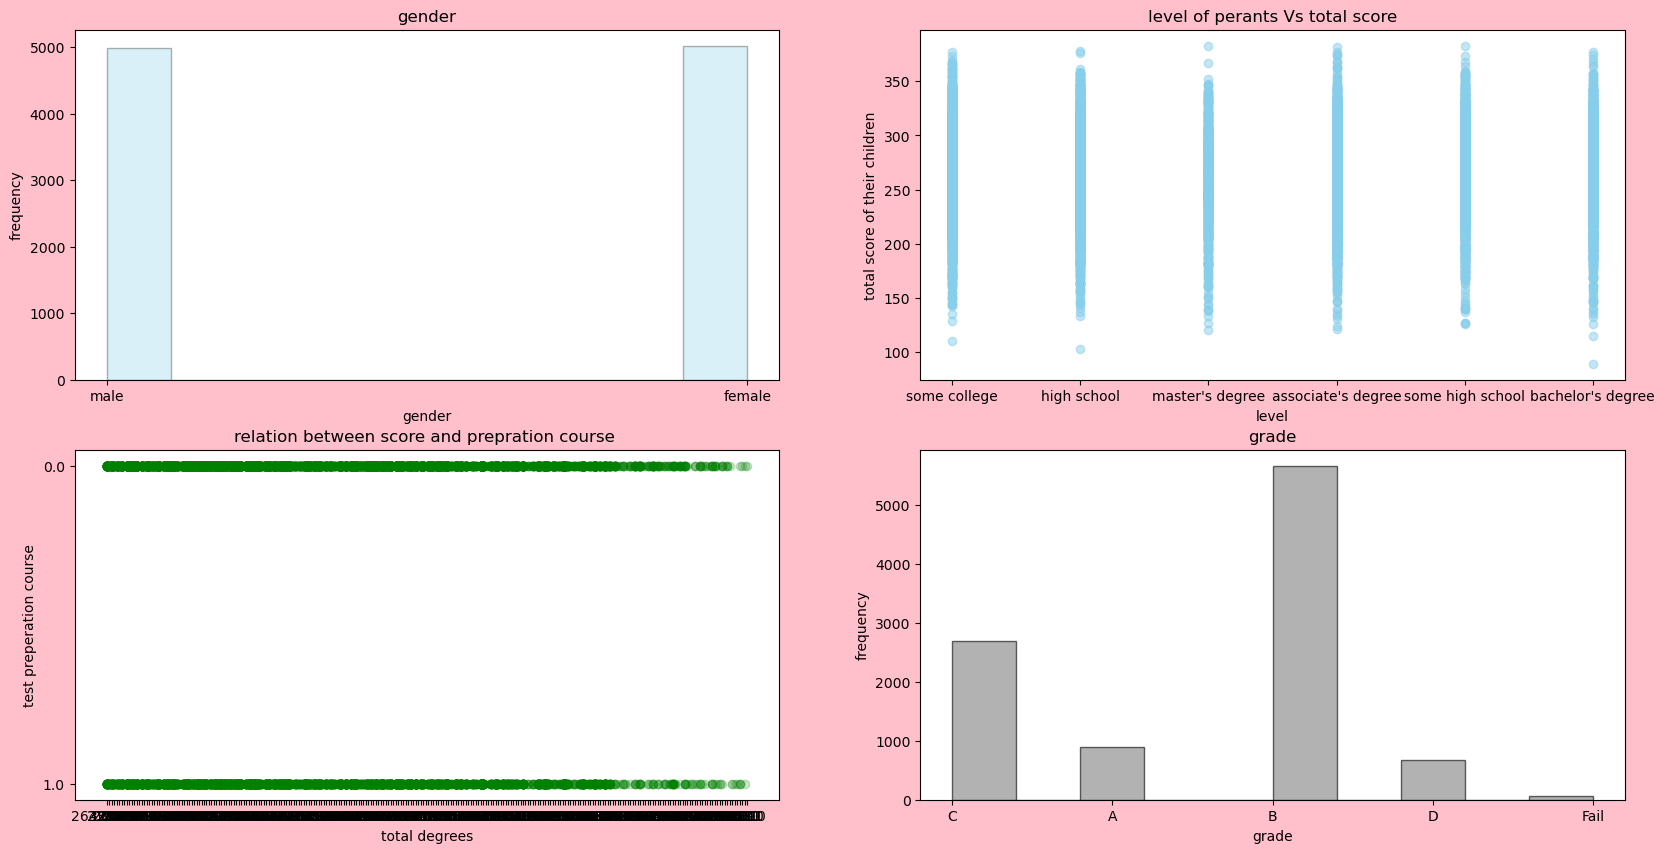

In [2691]:
fig,axs=plt.subplots(2,2,figsize=(20,10))
fig.set_facecolor('pink')

axs[0,0].hist(mydata['gender'].astype(str),color='skyblue',edgecolor='black',alpha=.3)
axs[0,0].set_title('gender')
axs[0,0].set_xlabel('gender')
axs[0,0].set_ylabel('frequency')

axs[0,1].scatter(x=mydata['parental_level_of_education'].astype(str),y=mydata['total_score'],color='skyblue',alpha=.5)
axs[0,1].set_title('level of perants Vs total score')
axs[0,1].set_xlabel('level')
axs[0,1].set_ylabel('total score of their children')

axs[1,0].scatter(x=mydata['total_score'].astype(str),y=mydata['test_preparation_course'].astype(str),color='green',alpha=.2)
axs[1,0].set_title('relation between score and prepration course ')
axs[1,0].set_xlabel('total degrees')
axs[1,0].set_ylabel('test preperation course')

axs[1,1].hist(mydata['grade'].astype(str),color='grey',edgecolor='black',alpha=.6)
axs[1,1].set_title('grade')
axs[1,1].set_xlabel('grade')
axs[1,1].set_ylabel('frequency')

plt.show


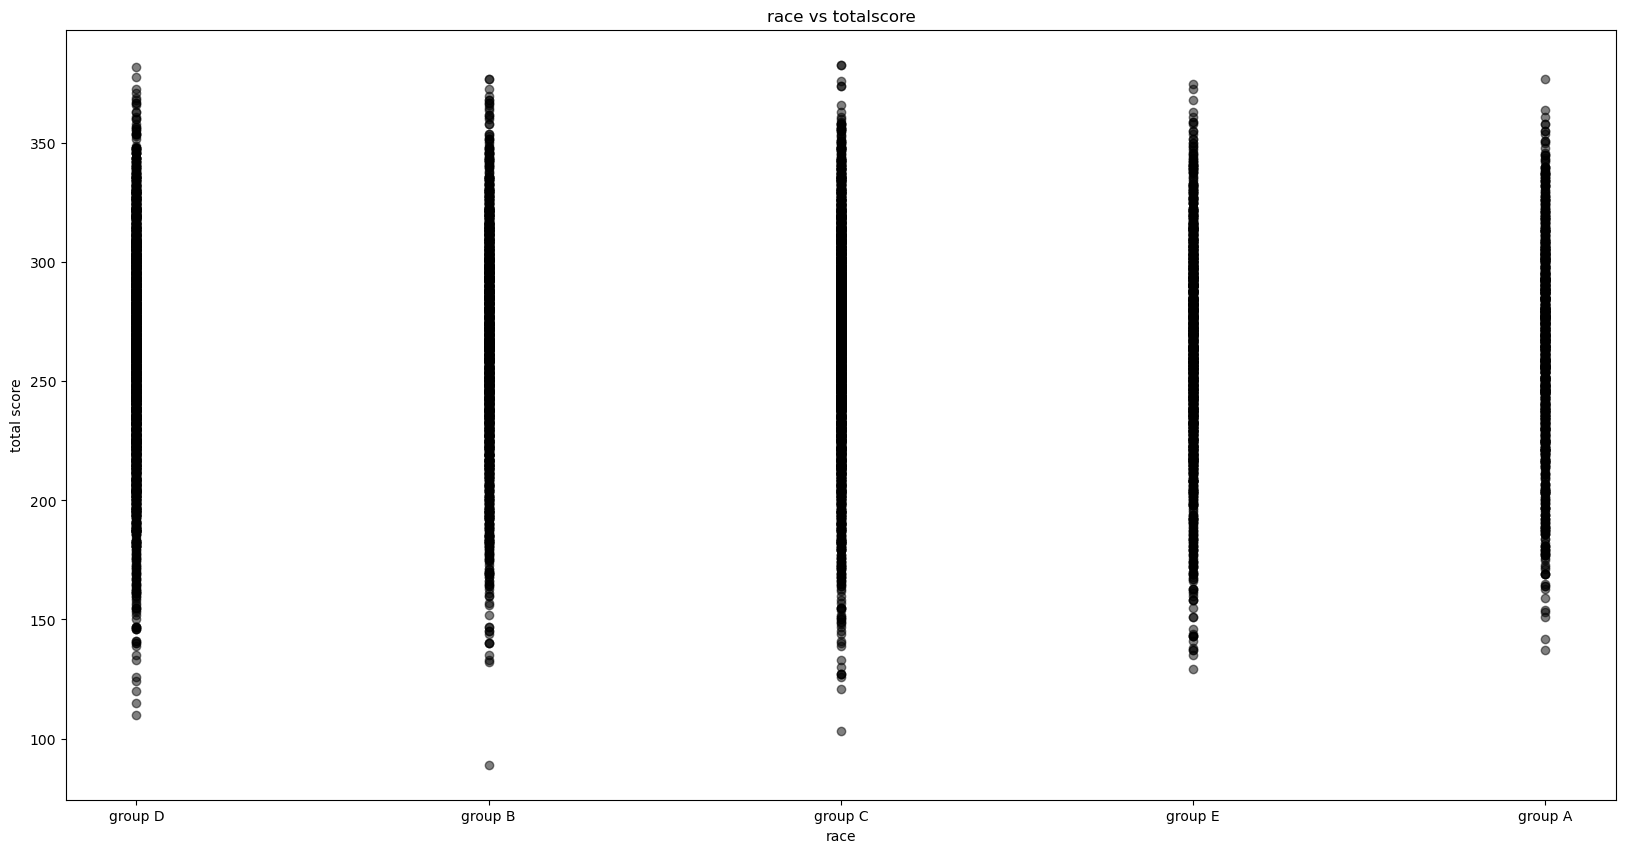

In [2692]:
plt.figure(figsize=(20,10))
plt.scatter(x=mydata['race_ethnicity'].astype(str),y=mydata['total_score'],color='black',alpha=.5)

plt.title('race vs totalscore')
plt.xlabel('race')
plt.ylabel('total score')
plt.show()

we have catogerial columns we will encode them using labelencoder (change into numbers started from 0)

In [2695]:
# we will take object
label=LabelEncoder()
# we will fit the data using this objet
mydata.loc[:,'gender']=label1.fit_transform(mydata['gender'])
mydata.loc[:,'race_ethnicity']=label1.fit_transform(mydata['race_ethnicity'])
mydata.loc[:,'parental_level_of_education']=label1.fit_transform(mydata['parental_level_of_education'])

we will draw correlation heatmap for numerical columns to choose the features that impact on our target
(total score)

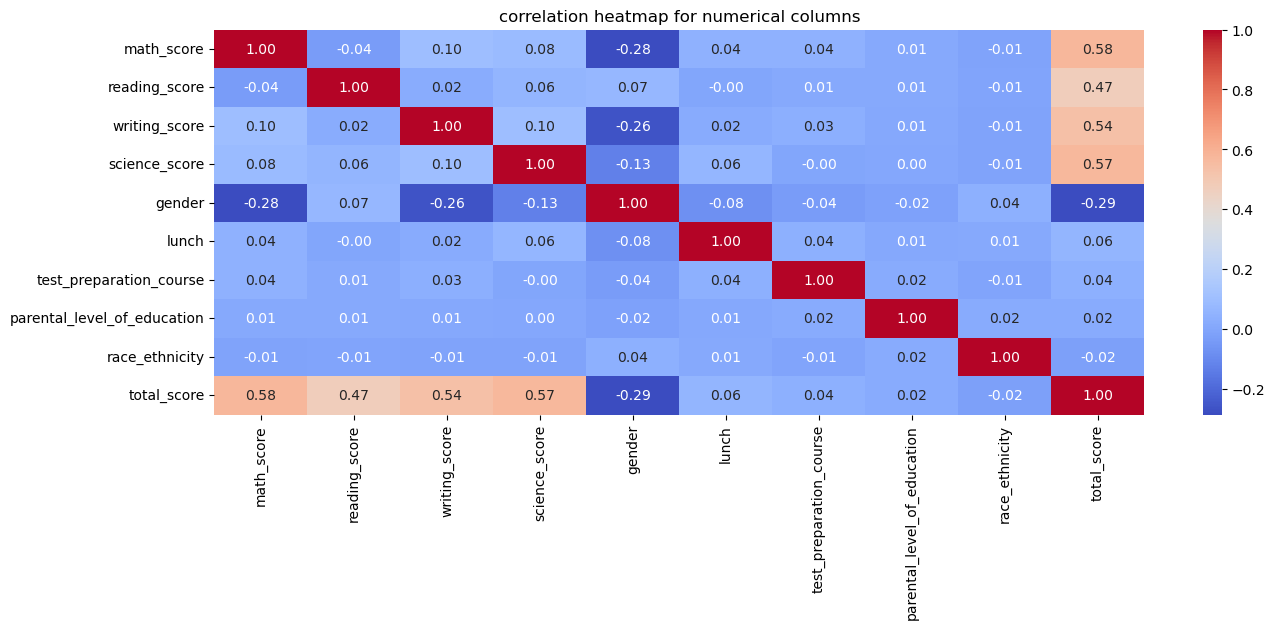

In [2697]:
corrccolums=['math_score','reading_score','writing_score','science_score','gender','lunch','test_preparation_course','parental_level_of_education',
            'race_ethnicity','total_score']
correlation_matrix=mydata[corrccolums].corr()
plt.figure(figsize=(15,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap for numerical columns')
plt.show()

from it we can see that our target has abig relation with 'math_score','writing_score','reading_score','science_score'

In [2699]:
data=mydata[['math_score','writing_score','reading_score','science_score','total_score']]
data=data.iloc[:,:]
data

,math_score,writing_score,reading_score,science_score,total_score
0,89.0,85.0,38.0,26.0,238.0
1,65.0,67.0,100.0,96.0,328.0
2,10.0,97.0,99.0,58.0,264.0
3,22.0,41.0,51.0,84.0,198.0
4,26.0,64.0,58.0,65.0,213.0
...,...,...,...,...,...
9995,78.0,46.0,60.0,58.0,242.0
9996,37.0,99.0,92.0,73.0,301.0
9997,70.0,100.0,71.0,90.0,331.0
9998,87.0,100.0,60.0,89.0,336.0


first model : linear regression
1) sample linear regression
we will choose the one feature ( has a strong relation with target)
we will choose math_score ( with the highest corr with total score) then we will change it into array
and y (target)(total score) to array ,elso.

In [2701]:
xforSLR=data['math_score']
xforSLR=np.array(xforSLR)
xforSLR

array([89., 65., 10., ..., 70., 87., 31.])

In [2702]:
y=data.iloc[:,4]
y

0       238.0
1       328.0
2       264.0
3       198.0
4       213.0
        ...  
9995    242.0
9996    301.0
9997    331.0
9998    336.0
9999    293.0
Name: total_score, Length: 10000, dtype: float64

In [2703]:
y=np.array(y)
y

array([238., 328., 264., ..., 331., 336., 293.])

now we will split the x ,y into x_trainSLR,x_testSLR,y_trainSLR,y_testSLR
then take object from[linear_model.LinearRegression()] 
and calculate the time before fit the model and after fit it 
to calculate total time that model had took.
now we fit the model by give the object (x_trainSLR ,y_trainSLR).
After fit the model we can print coef_ and intercept and predict with (x_testSLR or new data)
we can evaluate the model by using mean_absolute_error,mean_squared_error,r2_score.
r2_score expresses about how this model is good.
we can evaluate the model by using drawing ,too.

In [2705]:
x_trainSLR,x_testSLR,y_trainSLR,y_testSLR=train_test_split(xforSLR,y,test_size=0.2,random_state=1)
modelSLR=linear_model.LinearRegression()
starttime=time.time()
# reshape to make x 2D 
modelSLR.fit(x_trainSLR.reshape(-1,1),y_train)
endtime=time.time()
totaltimeSLR=endtime-starttime
modelSLR.coef_

array([1.1293916])

In [2706]:
modelSLR.predict([[80]])

array([290.69945016])

In [2709]:
prSLR=modelSLR.predict(x_testSLR.reshape(-1,1))
mean_absolute_error(y_testSLR,prSLR)

27.319771987137745

In [2711]:
mean_squared_error(y_testSLR,prSLR)

1154.3414997574814

In [2712]:
r1=r2_score(y_testSLR,prSLR)
r1

0.318290123818465

we will draw scatter between x,y and plot between x,yhat to see if this model  fit the data well

Text(0, 0.5, 'total score')

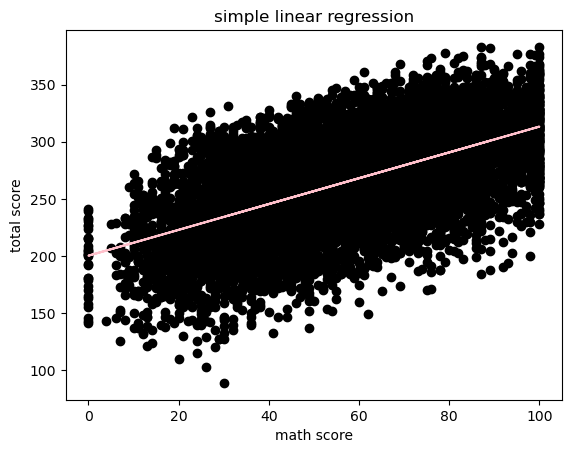

In [2715]:
plt.scatter(xforSLR,y,color='black')
plt.plot(xforSLR,model.predict(xforSLR.reshape(-1,1)),color='pink')
plt.title('simple linear regression')
plt.xlabel("math score")
plt.ylabel("total score")

2) multipule linear regression:
   we will take the higest corrleation columns with target

In [2727]:
xMLR=data.iloc[:,0:-1]
xMLR

,math_score,writing_score,reading_score,science_score
0,89.0,85.0,38.0,26.0
1,65.0,67.0,100.0,96.0
2,10.0,97.0,99.0,58.0
3,22.0,41.0,51.0,84.0
4,26.0,64.0,58.0,65.0
...,...,...,...,...
9995,78.0,46.0,60.0,58.0
9996,37.0,99.0,92.0,73.0
9997,70.0,100.0,71.0,90.0
9998,87.0,100.0,60.0,89.0


then we will split the x of MLR ,y into x_trainMLR,x_testMLR,y_trainMLR,y_testMLR int 80% to 20%
80% for train ,20% for test
we use train data to fit model and test data to evaluate model.

then take object from[linear_model.LinearRegression()] 
and calculate the time before fit the model and after fit it 
to calculate total time that model had took.
now we fit the model by give the object (x_trainMLR ,y_trainMLR).
After fit the model we can print coefs and intercept and predict with (x_testMLR or new data)
we can evaluate the model by using mean_absolute_error,mean_squared_error,r2_score.
r2_score expresses about how this model is good.
but there drawing are very hard we have 5D dim.

In [2730]:
x_trainMLR,x_testMLR,y_trainMLR,y_testMLR=train_test_split(xMLR,y,test_size=0.2,random_state=1)
modelMLR=linear_model.LinearRegression()
starttime=time.time()
modelMLR.fit(x_trainMLR,y_trainMLR)
endtime=time.time()
totaltimeMLR=endtime-starttime
modelMLR.coef_

array([0.99782569, 1.00087857, 0.99843562, 0.99709334])

In [2731]:
# we change input data into dataframe because we give the data to model in form of data frame
# we can undo this ,but this make the code better
predict=modelMLR.predict(pd.DataFrame([[20,50,60,100]],columns=xMLR.columns))
predict

array([229.945147])

In [2732]:
prMLR=modelMLR.predict(x_testMLR)
mean_absolute_error(y_testMLR,prMLR)

0.2837855572821304

In [2733]:
mean_squared_error(y_testMLR,prMLR)

5.368649386349388

In [2738]:
r2=r2_score(y_testMLR,prMLR)
r2

0.9968294813023709

3) polynomial regression of 2 degree
   we will take object of PolynomialFeatures of degree 2 then we will fit and tranform
   one our feature( the same feature in SLR) to 2 degree poly (means the largest power in equation is 2)
   we will have three terms (x0=1,x1=x,x2=x**2)
   then we will change the output into data frame to deal with it easily

In [2740]:
polyof2D=PolynomialFeatures(degree=2)
xfeatursof2d=poly.fit_transform(xforSLR.reshape(-1,1))
xfeatursof2d=pd.DataFrame(xfeatursof2d)
xfeatursof2d


,0,1,2
0,1.0,89.0,7921.0
1,1.0,65.0,4225.0
2,1.0,10.0,100.0
3,1.0,22.0,484.0
4,1.0,26.0,676.0
...,...,...,...
9995,1.0,78.0,6084.0
9996,1.0,37.0,1369.0
9997,1.0,70.0,4900.0
9998,1.0,87.0,7569.0


we now have problem in sample ,multipule all features had have the same scale
but know (x**2) has a large scale than (x) .
For this reason we will do scale in all features .
I will use minmaxscaler to make the feature between 0 and 1 .
we will take object from MinMaxScaler then fit and transform all features.

In [2743]:
scaler=MinMaxScaler(feature_range=(0,1))
xfeatursof2d.loc[:,1]=scaler.fit_transform(xfeatursof2d[[1]].astype(float))
xfeatursof2d.loc[:,2]=scaler.fit_transform(xfeatursof2d[[2]].astype(float))
xfeatursof2d

C:\Users\El_manfy\AppData\Local\Temp\ipykernel_6872\1993893224.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[0.89]
 [0.65]
 [0.1 ]
 ...
 [0.7 ]
 [0.87]
 [0.31]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  xfeatursof2d.loc[:,1]=scaler.fit_transform(xfeatursof2d[[1]].astype(float))


,0,1,2
0,1.0,0.89,0.7921
1,1.0,0.65,0.4225
2,1.0,0.10,0.0100
3,1.0,0.22,0.0484
4,1.0,0.26,0.0676
...,...,...,...
9995,1.0,0.78,0.6084
9996,1.0,0.37,0.1369
9997,1.0,0.70,0.4900
9998,1.0,0.87,0.7569


now we will split the x ,y into x_train2d,x_test2d,y_train2d,y_test2d
then take object from[linear_model.LinearRegression()] 
and calculate the time before fit the model and after fit it 
to calculate total time that model had took.
now we fit the model by give the object (x_train2d ,y_train2d).
After fit the model we can print coefs and intercept and predict with (x_test2d or new data)
we can evaluate the model by using mean_absolute_error,mean_squared_error,r2_score.
r2_score expresses about how this model is good.
we can evaluate the model by using drawing ,too.

In [2747]:
x_train2d,x_test2d,y_train2d,y_test2d=train_test_split(xfeatursof2d,y,test_size=0.2,random_state=1)
starttime=time.time()
model2d=linear_model.LinearRegression()
model2d.fit(x_train2d,y_train2d)
endtime=time.time()
totaltime2d=endtime-starttime
model2d.coef_

array([  0.        , 169.47595309, -50.70020178])

In [2749]:
pr2d=model2d.predict(x_test2d)
r2d=r2_score(y_test2d,pr2d)
r2d

0.3226145708687669

In [2751]:
mean_squared_error(y_test2d,pr2d)

1147.0188998244596

In [2753]:
 mean_absolute_error(y_test2d,pr2d)

27.212184879759107

we will draw scatter between x,y and plot between x,yhat to see if this model  fit the data well

Text(0, 0.5, 'total score')

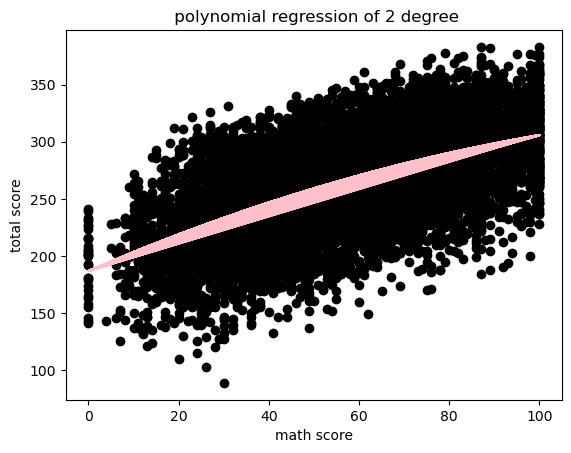

In [2755]:
plt.scatter(xforSLR,y,color='black')
plt.plot(xforSLR,model2d.predict(xfeatursof2d),color='pink')
plt.title(' polynomial regression of 2 degree')
plt.xlabel("math score")
plt.ylabel("total score")

4) polynomial regression of 3 degree
   we will take object of PolynomialFeatures of degree 3 then we will fit and tranform
   one our feature( the same feature in SLR) to 3 degree poly (means the largest power in equation is 3)
   we will have four terms (x0=1,x1=x,x2=x**2,x3=x^3)
   then we will change the output into data frame to deal with it easily

In [2757]:
poly3d=PolynomialFeatures(degree=3)
xfeatures3d=poly3d.fit_transform(xforSLR.reshape(-1,1))
xfeatures3d=pd.DataFrame(xfeatures3d)
xfeatures3d


,0,1,2,3
0,1.0,89.0,7921.0,704969.0
1,1.0,65.0,4225.0,274625.0
2,1.0,10.0,100.0,1000.0
3,1.0,22.0,484.0,10648.0
4,1.0,26.0,676.0,17576.0
...,...,...,...,...
9995,1.0,78.0,6084.0,474552.0
9996,1.0,37.0,1369.0,50653.0
9997,1.0,70.0,4900.0,343000.0
9998,1.0,87.0,7569.0,658503.0


we now have problem .
In sample ,multipule all features had have the same scale
but  (x**2)or(x^3) has a large scale than (x) .
For this reason we will do scale in all features .
I will use minmaxscaler to make the feature between 0 and 1 .
we will take object from MinMaxScaler then fit and transform all features.

In [2760]:
xfeatures3d.loc[:,1]=scaler.fit_transform(xfeatures3d[[1]].astype(float))
xfeatures3d.loc[:,2]=scaler.fit_transform(xfeatures3d[[2]].astype(float))
xfeatures3d.loc[:,3]=scaler.fit_transform(xfeatures3d[[3]].astype(float))
xfeatures3d

C:\Users\El_manfy\AppData\Local\Temp\ipykernel_6872\2905983460.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[0.89]
 [0.65]
 [0.1 ]
 ...
 [0.7 ]
 [0.87]
 [0.31]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  xfeatures3d.loc[:,1]=scaler.fit_transform(xfeatures3d[[1]].astype(float))


,0,1,2,3
0,1.0,0.89,0.7921,0.704969
1,1.0,0.65,0.4225,0.274625
2,1.0,0.10,0.0100,0.001000
3,1.0,0.22,0.0484,0.010648
4,1.0,0.26,0.0676,0.017576
...,...,...,...,...
9995,1.0,0.78,0.6084,0.474552
9996,1.0,0.37,0.1369,0.050653
9997,1.0,0.70,0.4900,0.343000
9998,1.0,0.87,0.7569,0.658503


now we will split the x ,y into x_train3d,x_test3d,y_train3d,y_test3d
then take object from[linear_model.LinearRegression()] 
and calculate the time before fit the model and after fit it 
to calculate total time that model had took.
now we fit the model by give the object (x_train3d ,y_train3d).
After fit the model we can print coefs and intercept and predict with (x_test3d or new data)
we can evaluate the model by using mean_absolute_error,mean_squared_error,r2_score.
r2_score expresses about how this model is good.
we can evaluate the model by using drawing ,too.

In [2762]:
x_train3d,x_test3d,y_train3d,y_test3d=train_test_split(xfeatures3d,y,test_size=0.2,random_state=1)
starttime=time.time()
model3d=linear_model.LinearRegression()
model3d.fit(x_train3d,y_train3d)
endtime=time.time()
totaltime3d=endtime-starttime
model3d.coef_

array([  0.        , 176.50221063, -65.21318135,   8.77613712])

In [2763]:
pr3d=model3d.predict(x_test3d)
r3d=r2_score(y_test3d,pr3d)
r3d

0.3224183482188149

In [2765]:
mean_squared_error(y_test3d,pr3d)

1147.351164261203

In [2771]:
mean_absolute_error(y_test3d,pr3d)

27.21564883770508

Text(0, 0.5, 'total score')

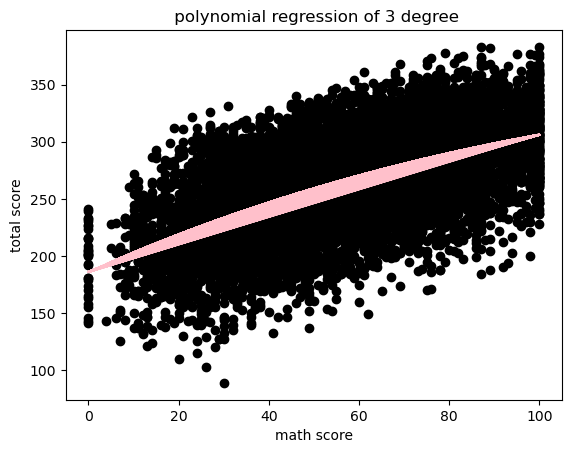

In [2773]:
plt.scatter(xforSLR,y,color='black')
plt.plot(xforSLR,model3d.predict(xfeatures3d),color='pink')
plt.title(' polynomial regression of 3 degree')
plt.xlabel("math score")
plt.ylabel("total score")

5) polynomial regression of 4 degree
   we will take object of PolynomialFeatures of degree 4 then we will fit and tranform
   one our feature( the same feature in SLR) to 4 degree poly (means the largest power in equation is 4)
   we will have five terms (x0=1,x1=x,x2=x**2,x3=x^3,x4=x^4)
   then we will change the output into data frame to deal with it easily
   then we will scale all feature such as degree 2 and 3.

In [2775]:
poly4d=PolynomialFeatures(degree=4)
xfeatures4d=poly4d.fit_transform(xforSLR.reshape(-1,1))
xfeatures4d=pd.DataFrame(xfeatures4d)
xfeatures4d

,0,1,2,3,4
0,1.0,89.0,7921.0,704969.0,62742241.0
1,1.0,65.0,4225.0,274625.0,17850625.0
2,1.0,10.0,100.0,1000.0,10000.0
3,1.0,22.0,484.0,10648.0,234256.0
4,1.0,26.0,676.0,17576.0,456976.0
...,...,...,...,...,...
9995,1.0,78.0,6084.0,474552.0,37015056.0
9996,1.0,37.0,1369.0,50653.0,1874161.0
9997,1.0,70.0,4900.0,343000.0,24010000.0
9998,1.0,87.0,7569.0,658503.0,57289761.0


In [2776]:
xfeatures4d.loc[:,1]=scaler.fit_transform(xfeatures4d[[1]].astype(float))
xfeatures4d.loc[:,2]=scaler.fit_transform(xfeatures4d[[2]].astype(float))
xfeatures4d.loc[:,3]=scaler.fit_transform(xfeatures4d[[3]].astype(float))
xfeatures4d.loc[:,4]=scaler.fit_transform(xfeatures4d[[4]].astype(float))
xfeatures4d

C:\Users\El_manfy\AppData\Local\Temp\ipykernel_6872\3430433920.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[0.89]
 [0.65]
 [0.1 ]
 ...
 [0.7 ]
 [0.87]
 [0.31]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  xfeatures4d.loc[:,1]=scaler.fit_transform(xfeatures4d[[1]].astype(float))


,0,1,2,3,4
0,1.0,0.89,0.7921,0.704969,0.627422
1,1.0,0.65,0.4225,0.274625,0.178506
2,1.0,0.10,0.0100,0.001000,0.000100
3,1.0,0.22,0.0484,0.010648,0.002343
4,1.0,0.26,0.0676,0.017576,0.004570
...,...,...,...,...,...
9995,1.0,0.78,0.6084,0.474552,0.370151
9996,1.0,0.37,0.1369,0.050653,0.018742
9997,1.0,0.70,0.4900,0.343000,0.240100
9998,1.0,0.87,0.7569,0.658503,0.572898


now we will split the x ,y into x_train4d,x_test4d,y_train4d,y_test4d
then take object from[linear_model.LinearRegression()] 
and calculate the time before fit the model and after fit it 
to calculate total time that model had took.
now we fit the model by give the object (x_train4d ,y_train4d).
After fit the model we can print coefs and intercept and predict with (x_test4d or new data)
we can evaluate the model by using mean_absolute_error,mean_squared_error,r2_score.
r2_score expresses about how this model is good.
we can evaluate the model by using drawing ,too.

In [2781]:
x_train4d,x_test4d,y_train4d,y_test4d=train_test_split(xfeatures4d,y,test_size=0.2,random_state=1)
starttime=time.time()
model4d=linear_model.LinearRegression()
model4d.fit(x_train4d,y_train4d)
endtime=time.time()
totaltime4d=endtime-starttime
model4d.coef_

array([  0.        , 160.5077863 ,  -6.08679486, -73.85957582,
        38.6663827 ])

In [2782]:
pr4d=model4d.predict(x_test4d)
r4d=r2_score(y_test4d,pr4d)
r4d

0.3224126905773165

In [2783]:
mean_squared_error(y_test4d,pr4d)

1147.360744363532

In [2784]:
mean_absolute_error(y_test4d,pr4d)

27.213976237892474

we can draw to see if a model fit the data well or not.
we will draw scatter between (x(one feature),y)
and plot between x,yhat that come from poly regreesion to see if this model  fit the data well
note: although we use poly regreesion when we make degree bigger it fit more data but not a very good
model

Text(0, 0.5, 'total score')

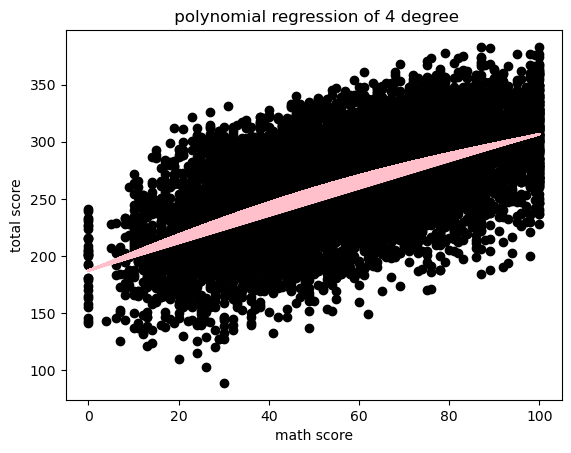

In [2786]:
plt.scatter(xforSLR,y,color='black')
plt.plot(xforSLR,model4d.predict(xfeatures4d),color='pink')
plt.title(' polynomial regression of 4 degree')
plt.xlabel("math score")
plt.ylabel("total score")

pipline:
    i will use pipline to fit ployregression of degree 4 model 
    first--> we take take object from linear_model.LinearRegression()
    second--> we will split the data ( x of SLR ,y)
    third-->we will use make_column_transformer to do scalar to all features after doing fit_transform as poly of degree 4
    forth-->we will use pipline . steps: first we will make poly then use object that we take from make_column_transformer 
    then we will send this data to object of linear to fit it 
    (we take number then change into poly equation of 4 degree then scale all columns then fit all columns )
    after this we will fit the data using the object that we have from pipline

In [2788]:
modelforpip=linear_model.LinearRegression()

In [2789]:
x_trainpip,x_testpip,y_trainpip,y_testpip=train_test_split(xforSLR,y,test_size=0.2,random_state=1)

In [2790]:
c1=make_column_transformer((scaler,[1]),(scaler,[2]),(scaler,[3]))

In [2791]:
pip=Pipeline(steps=[("poly4",poly3d),('change',c1),("linear regression f 3 drgree",modelforpip)])

In [2792]:
pip.fit(x_trainpip.reshape(-1,1),y_trainpip)

Pipeline(steps=[('poly4', PolynomialFeatures(degree=4)),
                ('change',
                 ColumnTransformer(transformers=[('minmaxscaler-1',
                                                  MinMaxScaler(), [1]),
                                                 ('minmaxscaler-2',
                                                  MinMaxScaler(), [2]),
                                                 ('minmaxscaler-3',
                                                  MinMaxScaler(), [3])])),
                ('linear regression f 4 drgree', LinearRegression())])

by using this object we can fit new result by using predict() funcation.
by using result we can calculuate r2_score and another metrices.

In [2794]:
prpip=pip.predict([[80]])
prpip

array([290.04340837])

In [2795]:
prpip=pip.predict(x_testpip.reshape(-1,1))
rpip=r2_score(y_testpip,prpip)
rpip

0.3224183482188143

now we will compare between the models using r2_score by using barplot.we note that the multipule linear regression
has a largest r2_score this means it is the better model.


<BarContainer object of 5 artists>

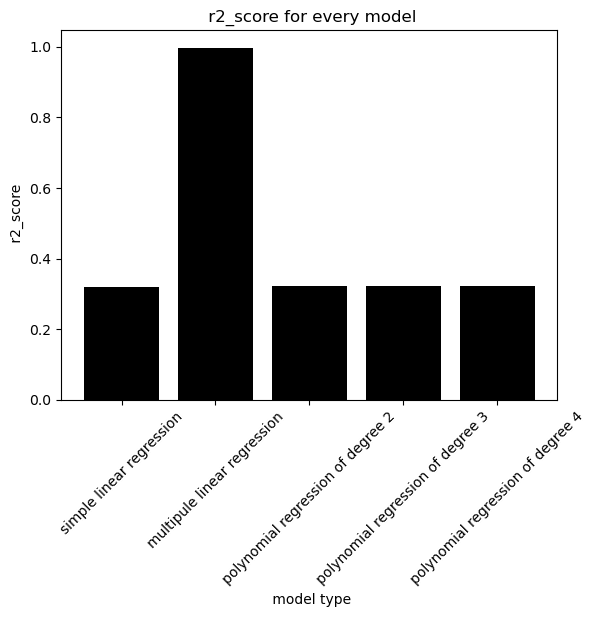

In [2797]:
modelname=['simple linear regression','multipule linear regression','polynomial regression of degree 2',
           'polynomial regression of degree 3','polynomial regression of degree 4']
rscore=[r1,r2,r2d,r3d,r4d]
plt.xticks(rotation=45)
plt.title(" r2_score for every model")
plt.xlabel(" model type")
plt.ylabel(" r2_score")
plt.bar(modelname,rscore,color='black')

we can compare between models by using total time of each model.


<BarContainer object of 5 artists>

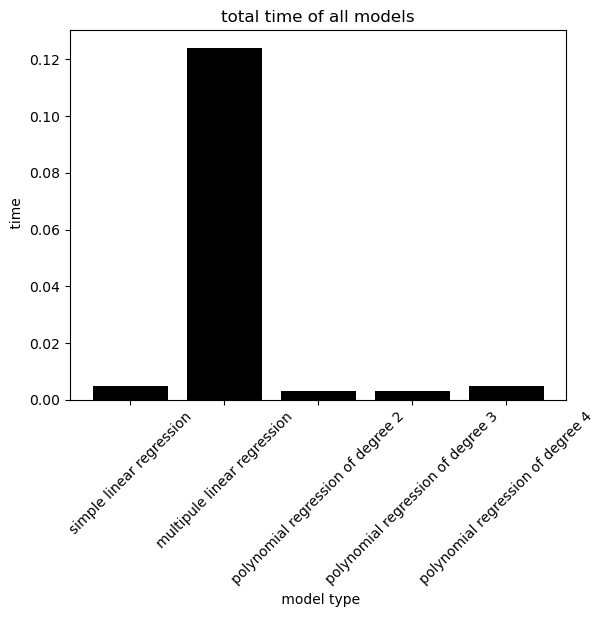

In [2799]:
modelname=['simple linear regression','multipule linear regression','polynomial regression of degree 2',
           'polynomial regression of degree 3','polynomial regression of degree 4']
rscore=[totaltimeSLR,totaltimeMLR,totaltime2d,totaltime3d,totaltime4d]
plt.bar(modelname,rscore,color='black')
plt.xticks(rotation=45)
plt.title("total time of all models")
plt.xlabel(" model type")
plt.ylabel(" time")

Logistic Regression:
first we will read the data then show it.

In [2801]:
logisticdata=pd.read_csv('C:/Users/El_manfy/Downloads/archive (3)/diabetes_prediction_dataset.csv')
logisticdata

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


second we will explore the data we will see missing values ,duplication ,consistency,....

In [2803]:
logisticdata.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [2804]:
logisticdata.duplicated().sum()

3854

In [2805]:
logisticdata=logisticdata.drop_duplicates()
logisticdata['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [2806]:
logisticdata['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [2807]:
logisticdata.loc[logisticdata['gender']=='Other','gender']= 'Male'

In [2808]:
logisticdata['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

now --> we will change non-numerical columns to numerical using labelencoder
and scale all features bettween 0 and 1 

In [2831]:
label1=LabelEncoder()
logisticdata.loc[:,'gender']=label1.fit_transform(logisticdata['gender'])
logisticdata.loc[:,'smoking_history']=label1.fit_transform(logisticdata['smoking_history'])
logisticdata.loc[:,'age']=scaler.fit_transform(logisticdata[['age']])
logisticdata.loc[:,'bmi']=scaler.fit_transform(logisticdata[['bmi']])
logisticdata.loc[:,'HbA1c_level']=scaler.fit_transform(logisticdata[['HbA1c_level']])
logisticdata.loc[:,'blood_glucose_level']=scaler.fit_transform(logisticdata[['blood_glucose_level']])
logisticdata.loc[:,'smoking_history']=scaler.fit_transform(logisticdata['smoking_history'].values.reshape(-1,1))
logisticdata

C:\Users\El_manfy\AppData\Local\Temp\ipykernel_6872\3462256836.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.27272727 0.         0.35454545 ... 0.34090909 0.09090909 0.04545455]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  logisticdata.loc[:,'blood_glucose_level']=scaler.fit_transform(logisticdata[['blood_glucose_level']])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000000,0,1,0.8,0.177171,0.563636,0.272727,0
1,0,0.674675,0,0,0.0,0.202031,0.563636,0.000000,0
2,1,0.349349,0,0,0.8,0.202031,0.400000,0.354545,0
3,0,0.449449,0,0,0.2,0.156863,0.272727,0.340909,0
4,1,0.949950,1,1,0.2,0.118231,0.236364,0.340909,0
...,...,...,...,...,...,...,...,...,...
99994,0,0.449449,0,0,0.0,0.170285,0.236364,0.295455,0
99996,0,0.024024,0,0,0.0,0.085901,0.545455,0.090909,0
99997,1,0.824825,0,0,0.6,0.207983,0.400000,0.340909,0
99998,0,0.299299,0,0,0.8,0.296569,0.090909,0.090909,0


we will use correlation heatmap to see the feature .
from it we can notice that blood_glucose_level(x) has a strongest relation with diabetes(target)(y)

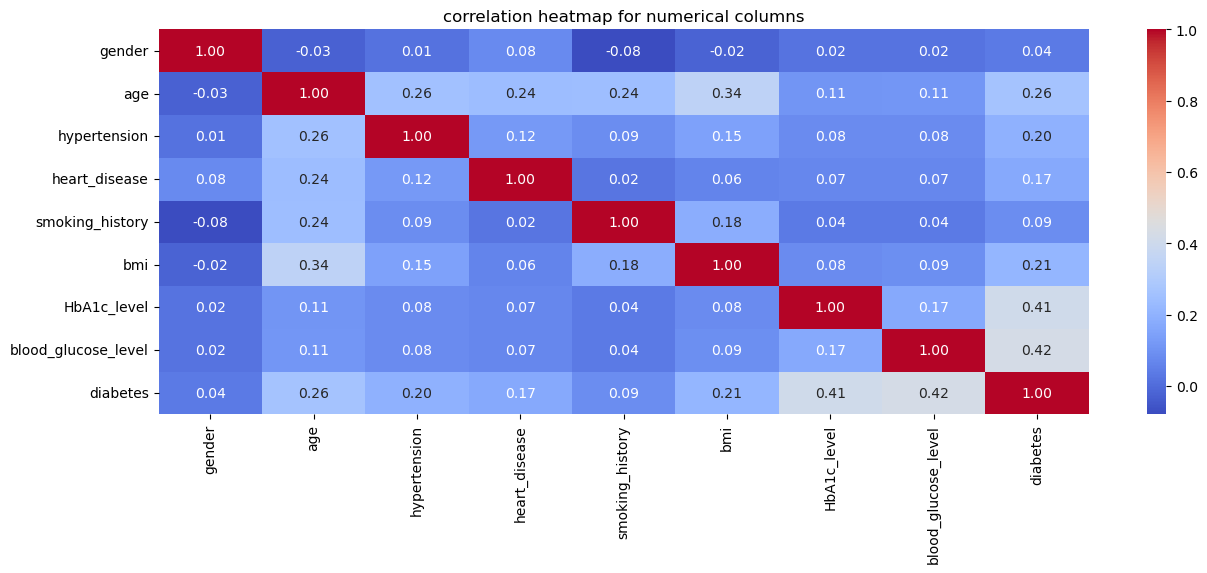

In [2834]:
corrccolums=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes']
correlation_matrix=logisticdata[corrccolums].corr()
plt.figure(figsize=(15,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap for numerical columns')
plt.show()

In [2835]:
xslg=logisticdata['blood_glucose_level'].values
ylg=logisticdata['diabetes'].values

After change target and feature into array.
we will split the data to 80% for train and 20% for test.
then we will take object from LogisticRegression() and fit the model.
we calculate the total time ,too.
we can print coef_ an itercept_ .
we predict y hat by using( test data or now data)
we will  use metrics.accuracy_score to calculate the accuracy of model.
we can evlatue the model by using confusion_matrix,ConfusionMatrixDisplay.
they show true label and prediction label from it you can see the number of sample that
true label=prediction label and number of sample true label!=prediction label

In [2839]:
x_trainslg,x_testslg,y_trainslg,y_testslg=train_test_split(xslg,ylg,test_size=0.2,random_state=1)
slog= LogisticRegression()
starttime=time.time()
slog.fit(x_trainslg.reshape(-1,1),y_trainslg)
endtime=time.time()
totaltimeslg=endtime-starttime
slog.coef_

array([[7.49954725]])

In [2841]:
slog.intercept_

array([-5.01955663])

In [2843]:
preslg=slog.predict(x_testslg.reshape(-1,1))
accuracyslg=metrics.accuracy_score(y_testslg,preslg)
accuracyslg

0.9394878622095563

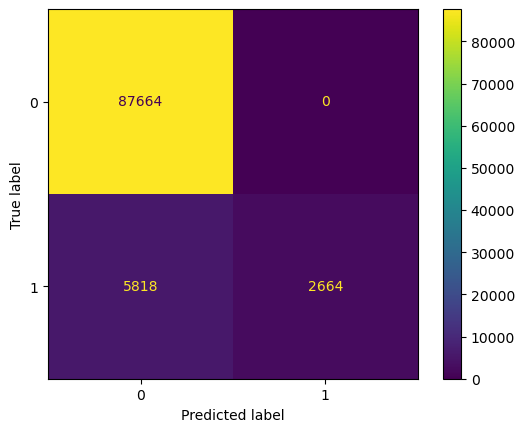

In [2844]:
d= ConfusionMatrixDisplay(confusion_matrix(y_testslgpreslg))
d.plot()
plt.show()

pipline: 
I will use it here too.
first--> we will take object of LogisticRegression()
second-->then take object from pipline has steps: change --> we will 
make scaler in it , logistic linear we will fit the logistic in it.
then we will fit this object on our data.
we can predict and calcaluate accuracy such above.

In [2846]:
logpip= LogisticRegression()
pip2=Pipeline(steps=[("change",scaler),("logistic linear",logpip)])
pip2.fit(x_trainslg.reshape(-1,1),y_trainslg)

Pipeline(steps=[('change', MinMaxScaler()),
                ('logistic linear', LogisticRegression())])

In [2847]:
prefrompiplgs=pip2.predict([[.8]])
prefrompiplgs

array([1], dtype=int64)

In [2852]:
pre1=pip2.predict(x_testslg.reshape(-1,1))
accuracy1=metrics.accuracy_score(y_testslg,pre1)
accuracy1 

0.9394878622095563

we will try do logistic regreesion but using multipule features ( all columns expected target)
we will split the data such above and complete such logistic regreesion with one feature.
note: we can use predict_proba to know the membership of sample into our two class (0,1)

In [2855]:
xtotalformlg=logisticdata.iloc[:,:-1].values
x_trainmlg,x_testmlg,y_trainmlg,y_testmlg=train_test_split(xtotalformlg,ylg,test_size=0.2,random_state=1)
starttime=time.time()
multilog= LogisticRegression()
multilog.fit(x_trainmlg,y_trainmlg)
endtime=time.time()
totaltimemlg=endtime-starttime
multilog.coef_

D:\hasnaa\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([[ 0.25784777,  3.60436342,  0.72281387,  0.70233851,  0.40854471,
         7.05288546, 12.21045478,  7.11288309]])

In [2856]:
multilog.intercept_

array([-15.12528599])

In [2857]:
premlg=multilog.predict(x_testmlg)
premlg

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [2858]:
multilog.predict_proba(x_trainmlg)

array([[8.51812472e-01, 1.48187528e-01],
       [9.99065903e-01, 9.34096885e-04],
       [9.99548554e-01, 4.51446373e-04],
       ...,
       [9.59570908e-01, 4.04290919e-02],
       [9.99069360e-01, 9.30639946e-04],
       [8.90101171e-01, 1.09898829e-01]])

In [2863]:
confusion_matrix(y_testmlg,premlg)

array([[17313,   176],
       [  650,  1091]], dtype=int64)

In [2865]:
accuracymlg=metrics.accuracy_score(y_testmlg,premlg)
accuracymlg

0.9590102552368274

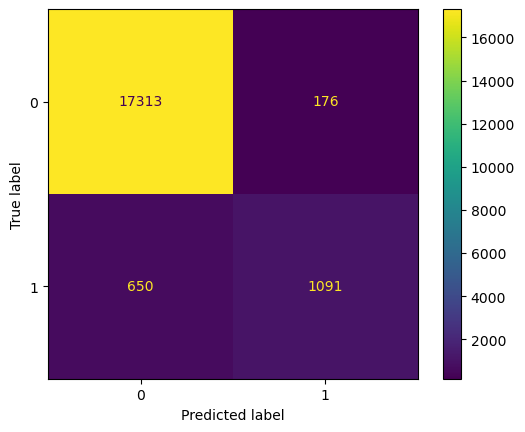

In [2866]:
d= ConfusionMatrixDisplay(confusion_matrix(y_testmlg,premlg))
d.plot()
plt.show()

we can use heatmap instead of ConfusionMatrixDisplay and it will do the same role.
we can compare between simple logistic and logistic with multipule feature by using accuracy or time such we do in regression above.

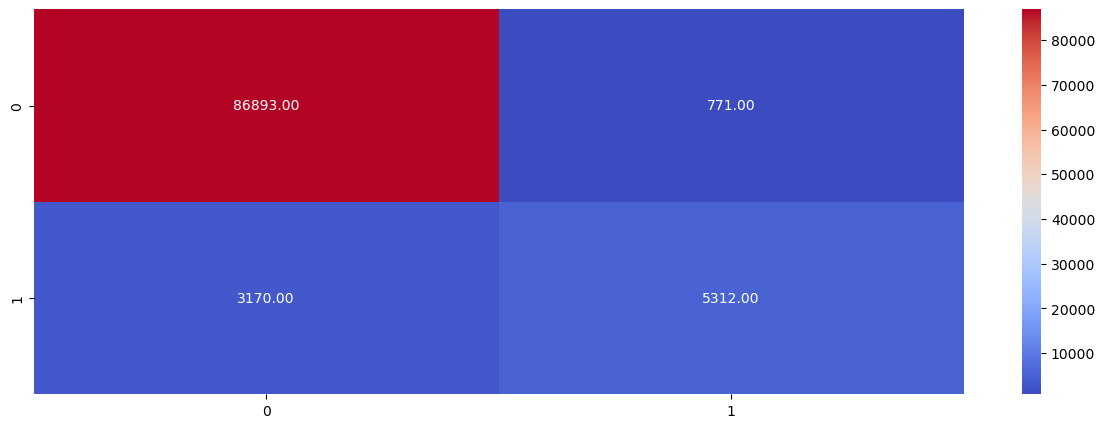

In [2868]:
pretotal=multilog.predict(xtotalformlg)
cs=confusion_matrix(ylg,pretotal)
plt.figure(figsize=(15,5))
sns.heatmap(cs,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

<BarContainer object of 2 artists>

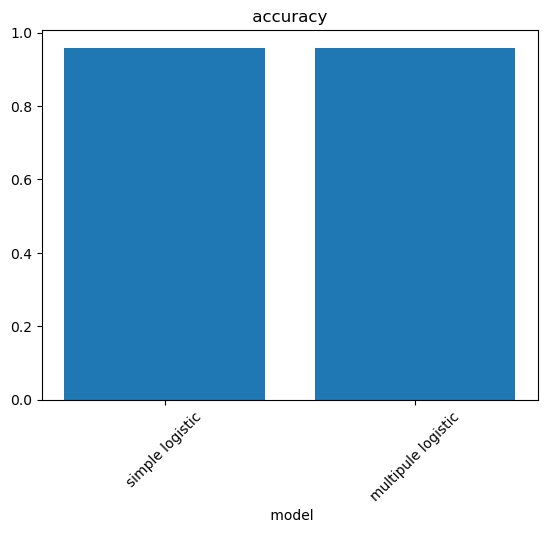

In [2869]:
modelname=['simple logistic','multipule logistic']
rscore=[accuracymlg,accuracymlg]
plt.xticks(rotation=45)
plt.title(" accuracy ")
plt.xlabel(" model")
plt.bar(modelname,rscore)

from draing we can notice that the two have similar accuracy ,but logistic with multipule varaible take a long time.
simple logistic is better here.

<BarContainer object of 2 artists>

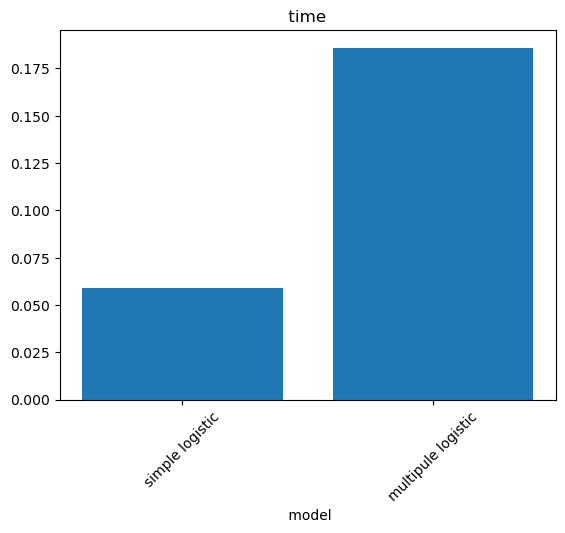

In [2872]:
modelname=['simple logistic','multipule logistic']
rscore=[totaltimeslg,totaltimemlg]
plt.xticks(rotation=45)
plt.title(" time ")
plt.xlabel(" model")
plt.bar(modelname,rscore)

                                          Summaries
1)linear regression
There are alot of models .we choose the model depond on the data . if model don't achive a good result ,you must choose another.
In this code we use linear regression ,but in different forms.Simple linear regression use one feature to fit the data.
Multipule linear regression use multipule features to fit the data.polynomial regreesion of degree(n) use one feature but it change this featue into
polynomial equation of degree(n) we use to fit the data better and make the drawing more smooth.
In this code the better model was Multipule linear regression with a highest r2_score value.
notes:
(fit) the data means find the equation (B^) that we will use to calcaluate the yhat.
(predict): function take the value of x and return yhat by using the equation that already had fitted.
poly(n): make equation with largest power equel n. 
r2_score: show the accuracy of regression model.
split data: we do it in all model to divide the data into train and test data.(we used in regression and logistic)
scale: we do it when the features has different scaling .we use it to make  a good unbaised model.(we used in regression and logistic)
labelencoder: to change non_numerical into numerical (we used in regression and logistic)
2) logistic regression
It is a type of classifaction ,but use regression .we use threshold to change contiouns values(regression) into discrete (classification).
In this code i try logistic regression using one feature (the highest correlation to the target) and i try logistic using all columns (expected target).
we can evlatue and compare those models by calculating accuracy or using ConfusionMatrixDisplay ,...
from comperation we can see that logistic regression with one feature are better (less time ,similar accuracy to another).
3)pipline
It express about steps by steps will excaute for all our inputs.
